In [199]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [200]:
df = pd.read_csv('../data/usd.csv')

In [201]:
#df.sort_values('Date', ascending=False)
df['Date']

0       04/30/21
1       04/29/21
2       04/28/21
3       04/27/21
4       04/26/21
          ...   
9001    01/24/86
9002    01/23/86
9003    01/22/86
9004    01/21/86
9005    01/20/86
Name: Date, Length: 9006, dtype: object

In [202]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

In [203]:
df.sort_values(by=['Date'], inplace=True, ascending=True)
df

,Date,Open,High,Low,Close
9005,1986-01-20,124.87,124.93,124.52,124.59
9004,1986-01-21,124.40,124.63,124.18,124.51
9003,1986-01-22,124.77,124.97,123.88,124.75
9002,1986-01-23,124.47,124.72,124.24,124.45
9001,1986-01-24,123.38,123.41,122.67,122.78
...,...,...,...,...,...
4,2021-04-26,90.86,90.99,90.68,90.81
3,2021-04-27,90.88,91.07,90.81,90.91
2,2021-04-28,90.90,91.13,90.55,90.61
1,2021-04-29,90.55,90.79,90.42,90.61


In [204]:
df = df.reset_index(drop=True)
df

,Date,Open,High,Low,Close
0,1986-01-20,124.87,124.93,124.52,124.59
1,1986-01-21,124.40,124.63,124.18,124.51
2,1986-01-22,124.77,124.97,123.88,124.75
3,1986-01-23,124.47,124.72,124.24,124.45
4,1986-01-24,123.38,123.41,122.67,122.78
...,...,...,...,...,...
9001,2021-04-26,90.86,90.99,90.68,90.81
9002,2021-04-27,90.88,91.07,90.81,90.91
9003,2021-04-28,90.90,91.13,90.55,90.61
9004,2021-04-29,90.55,90.79,90.42,90.61


In [205]:
df.shape

(9006, 5)

In [206]:
df.describe()

,Open,High,Low,Close
count,9006.000000,9006.000000,9006.000000,9006.000000
mean,92.051592,92.374709,91.729500,92.045970
std,10.095196,10.121954,10.061684,10.088405
min,71.330000,71.730000,70.700000,71.330000
25%,84.230000,84.565000,83.872500,84.232500
50%,91.930000,92.230000,91.605000,91.910000
75%,97.740000,98.030000,97.447500,97.727500
max,124.870000,124.970000,124.520000,124.750000


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9006 entries, 0 to 9005
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9006 non-null   datetime64[ns]
 1   Open    9006 non-null   float64       
 2   High    9006 non-null   float64       
 3   Low     9006 non-null   float64       
 4   Close   9006 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 351.9 KB


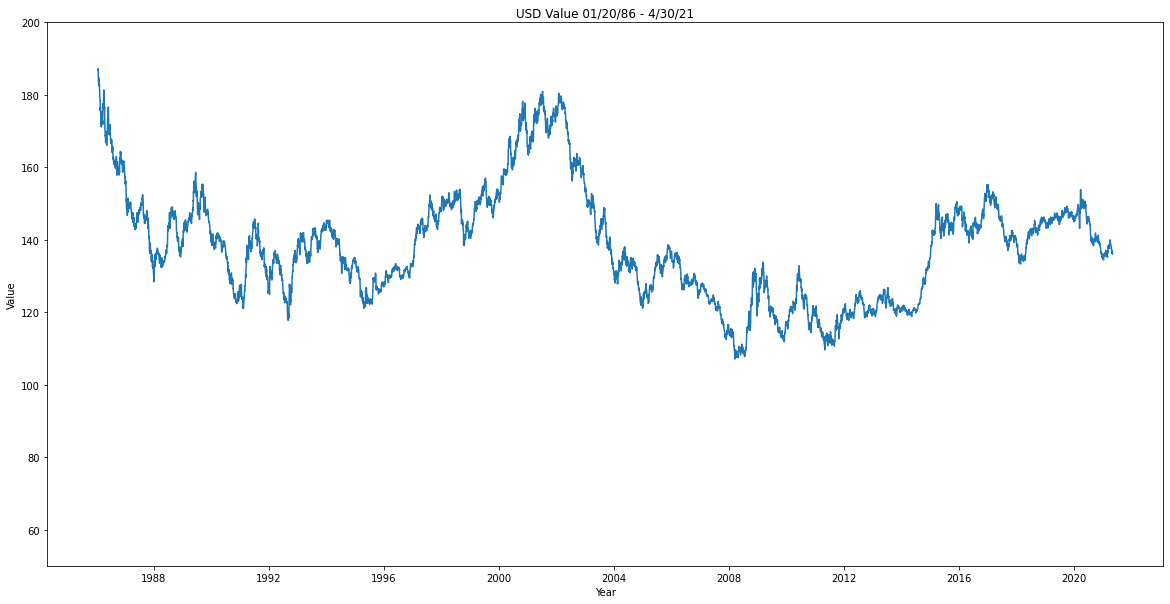

In [208]:
plt.figure(figsize=(20,10))

plt.plot(df['Date'], (df['High']+df['Low']/2))
plt.ylim((50,200))
#plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("USD Value 01/20/86 - 4/30/21")
plt.show()

In [359]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [360]:
model = keras.Sequential(name="USD_Sequencial")
model.add(layers.Dense(1, activation="relu", name="layer1"))
model.add(layers.Dense(25, activation="relu", name="layer2"))
model.add(layers.Dense(50, activation="relu", name="layer3"))
model.add(layers.Dense(100, activation="relu", name="layer4"))
model.add(layers.Dense(50, activation="relu", name="layer5"))
model.add(layers.Dense(25, activation="relu", name="layer6"))
model.add(layers.Dense(1, name="layer7"))

In [361]:
model.compile(optimizer="Adam", loss="mse", metrics=["mae"])

In [362]:
model.metrics_names

[]

In [363]:
train_test_split_index = 8000

model.fit(np.arange(0,train_test_split_index,1), df['Close'][0:train_test_split_index], batch_size=1, epochs=8)

Epoch 1/8
8000/8000 [==============================] - 4s 456us/step - loss: 1738.4169 - mae: 31.9428
Epoch 2/8
8000/8000 [==============================] - 4s 451us/step - loss: 105.0925 - mae: 8.1027
Epoch 3/8
8000/8000 [==============================] - 4s 450us/step - loss: 102.4193 - mae: 8.0218
Epoch 4/8
8000/8000 [==============================] - 4s 452us/step - loss: 120.1565 - mae: 8.8292
Epoch 5/8
8000/8000 [==============================] - 4s 452us/step - loss: 122.9097 - mae: 8.9884
Epoch 6/8
8000/8000 [==============================] - 4s 454us/step - loss: 118.6068 - mae: 8.7911
Epoch 7/8
8000/8000 [==============================] - 4s 453us/step - loss: 117.9751 - mae: 8.7566
Epoch 8/8
8000/8000 [==============================] - 4s 452us/step - loss: 115.9670 - mae: 8.6604


In [367]:
y_pred = model.predict(np.arange(train_test_split_index,9006,1))
y_pred.flatten().shape

(1006,)

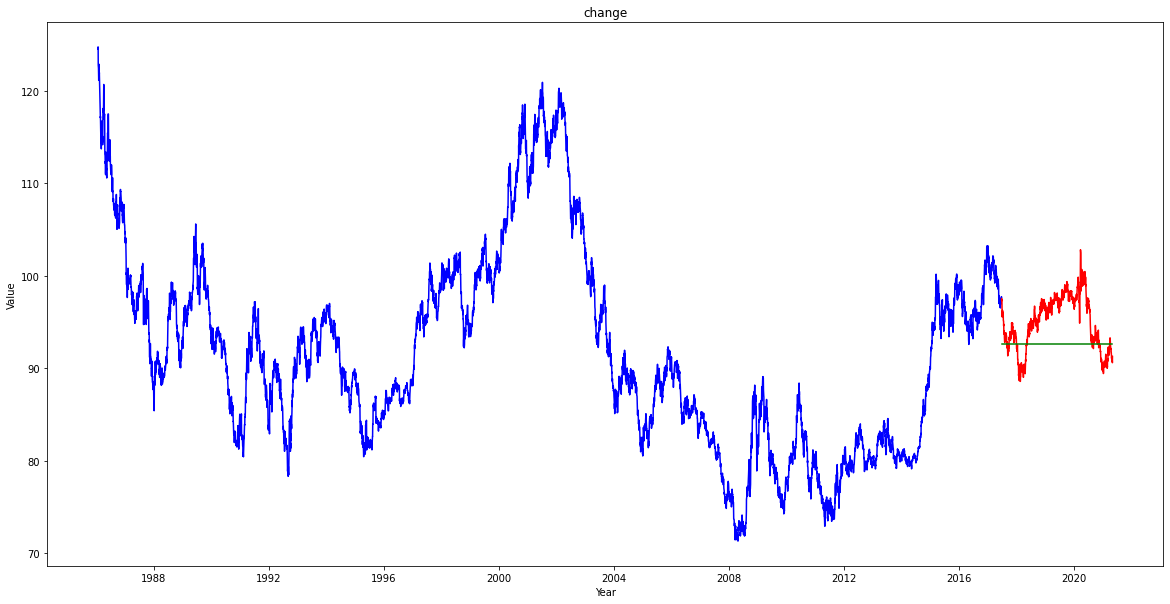

In [368]:
plt.figure(figsize=(20,10))

plt.plot(df['Date'][:train_test_split_index], df['Close'][:train_test_split_index], color='b')
plt.plot(df['Date'][train_test_split_index:9006], df['Close'][train_test_split_index:9006], color='r')
plt.plot(df['Date'][train_test_split_index:9006], y_pred.flatten(), color='g')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("change")
plt.show()

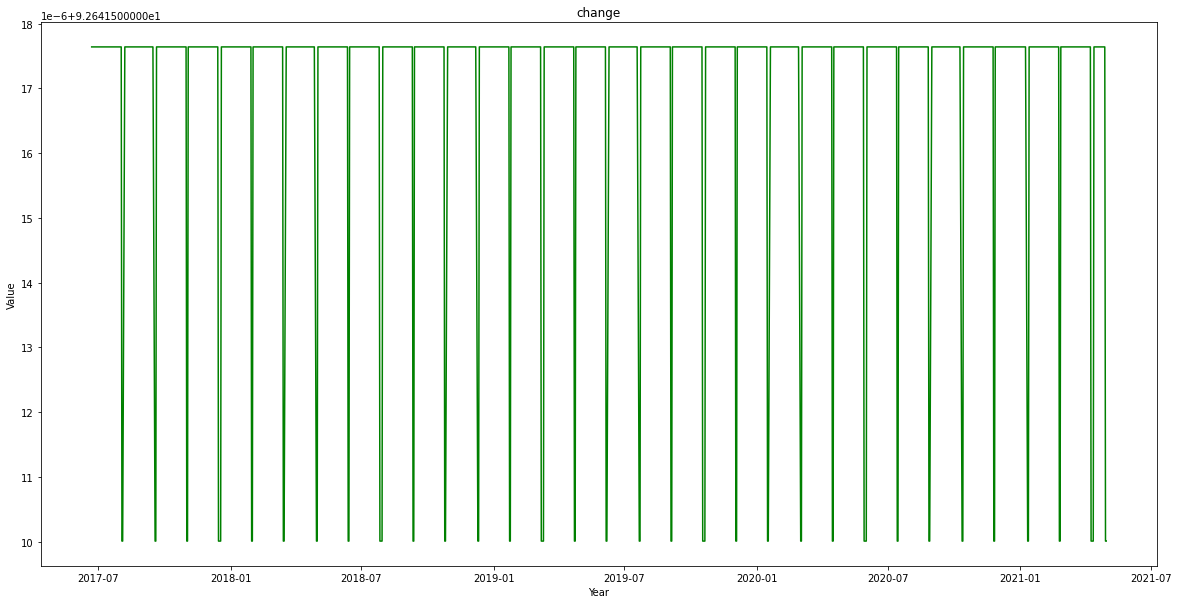

In [369]:
plt.figure(figsize=(20,10))

# plt.plot(df['Date'][:train_test_split_index], df['Close'][:train_test_split_index], color='b')
# plt.plot(df['Date'][train_test_split_index:9006], df['Close'][train_test_split_index:9006], color='r')
plt.plot(df['Date'][train_test_split_index:9006], y_pred.flatten(), color='g')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("change")
plt.show()